# World Happiness Analysis



In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.plotly as py
from plotly.offline import download_plotlyjs,init_notebook_mode,plot, iplot
import plotly.graph_objs as go

init_notebook_mode(connected=True)
sns.set(style="darkgrid",palette="pastel")
%matplotlib inline

# Part 1 - 'World Happiness Report' exploratory data analysis

### Loading Data sets

In [47]:
report2015 = pd.read_csv("world-happiness-report/2015.csv")
report2016 = pd.read_csv("world-happiness-report/2016.csv")
report2017 = pd.read_csv("world-happiness-report/2017.csv")
# changing the columns names of the 2017 dataset to match the style of the other two
report2017.columns = ['Country', 'Happiness Rank', 'Happiness Score', 'Whisker high',
       'Whisker low', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Generosity',
       'Trust (Government Corruption)', 'Dystopia Residual']

report2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


### Exploring the data

- First things first. Lets check the distribution of the 'Happiness Score' 

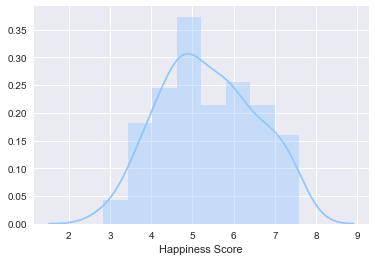

In [41]:
sns.distplot(report2015['Happiness Score'])

- Now lets see how our data is correlated

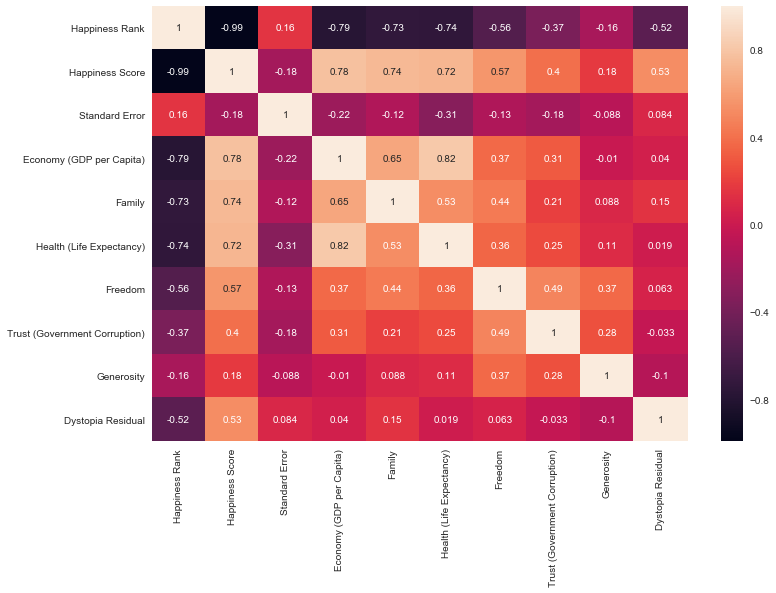

In [45]:
plt.figure(figsize=(12,8))
sns.heatmap(report2015.corr(), annot=True)

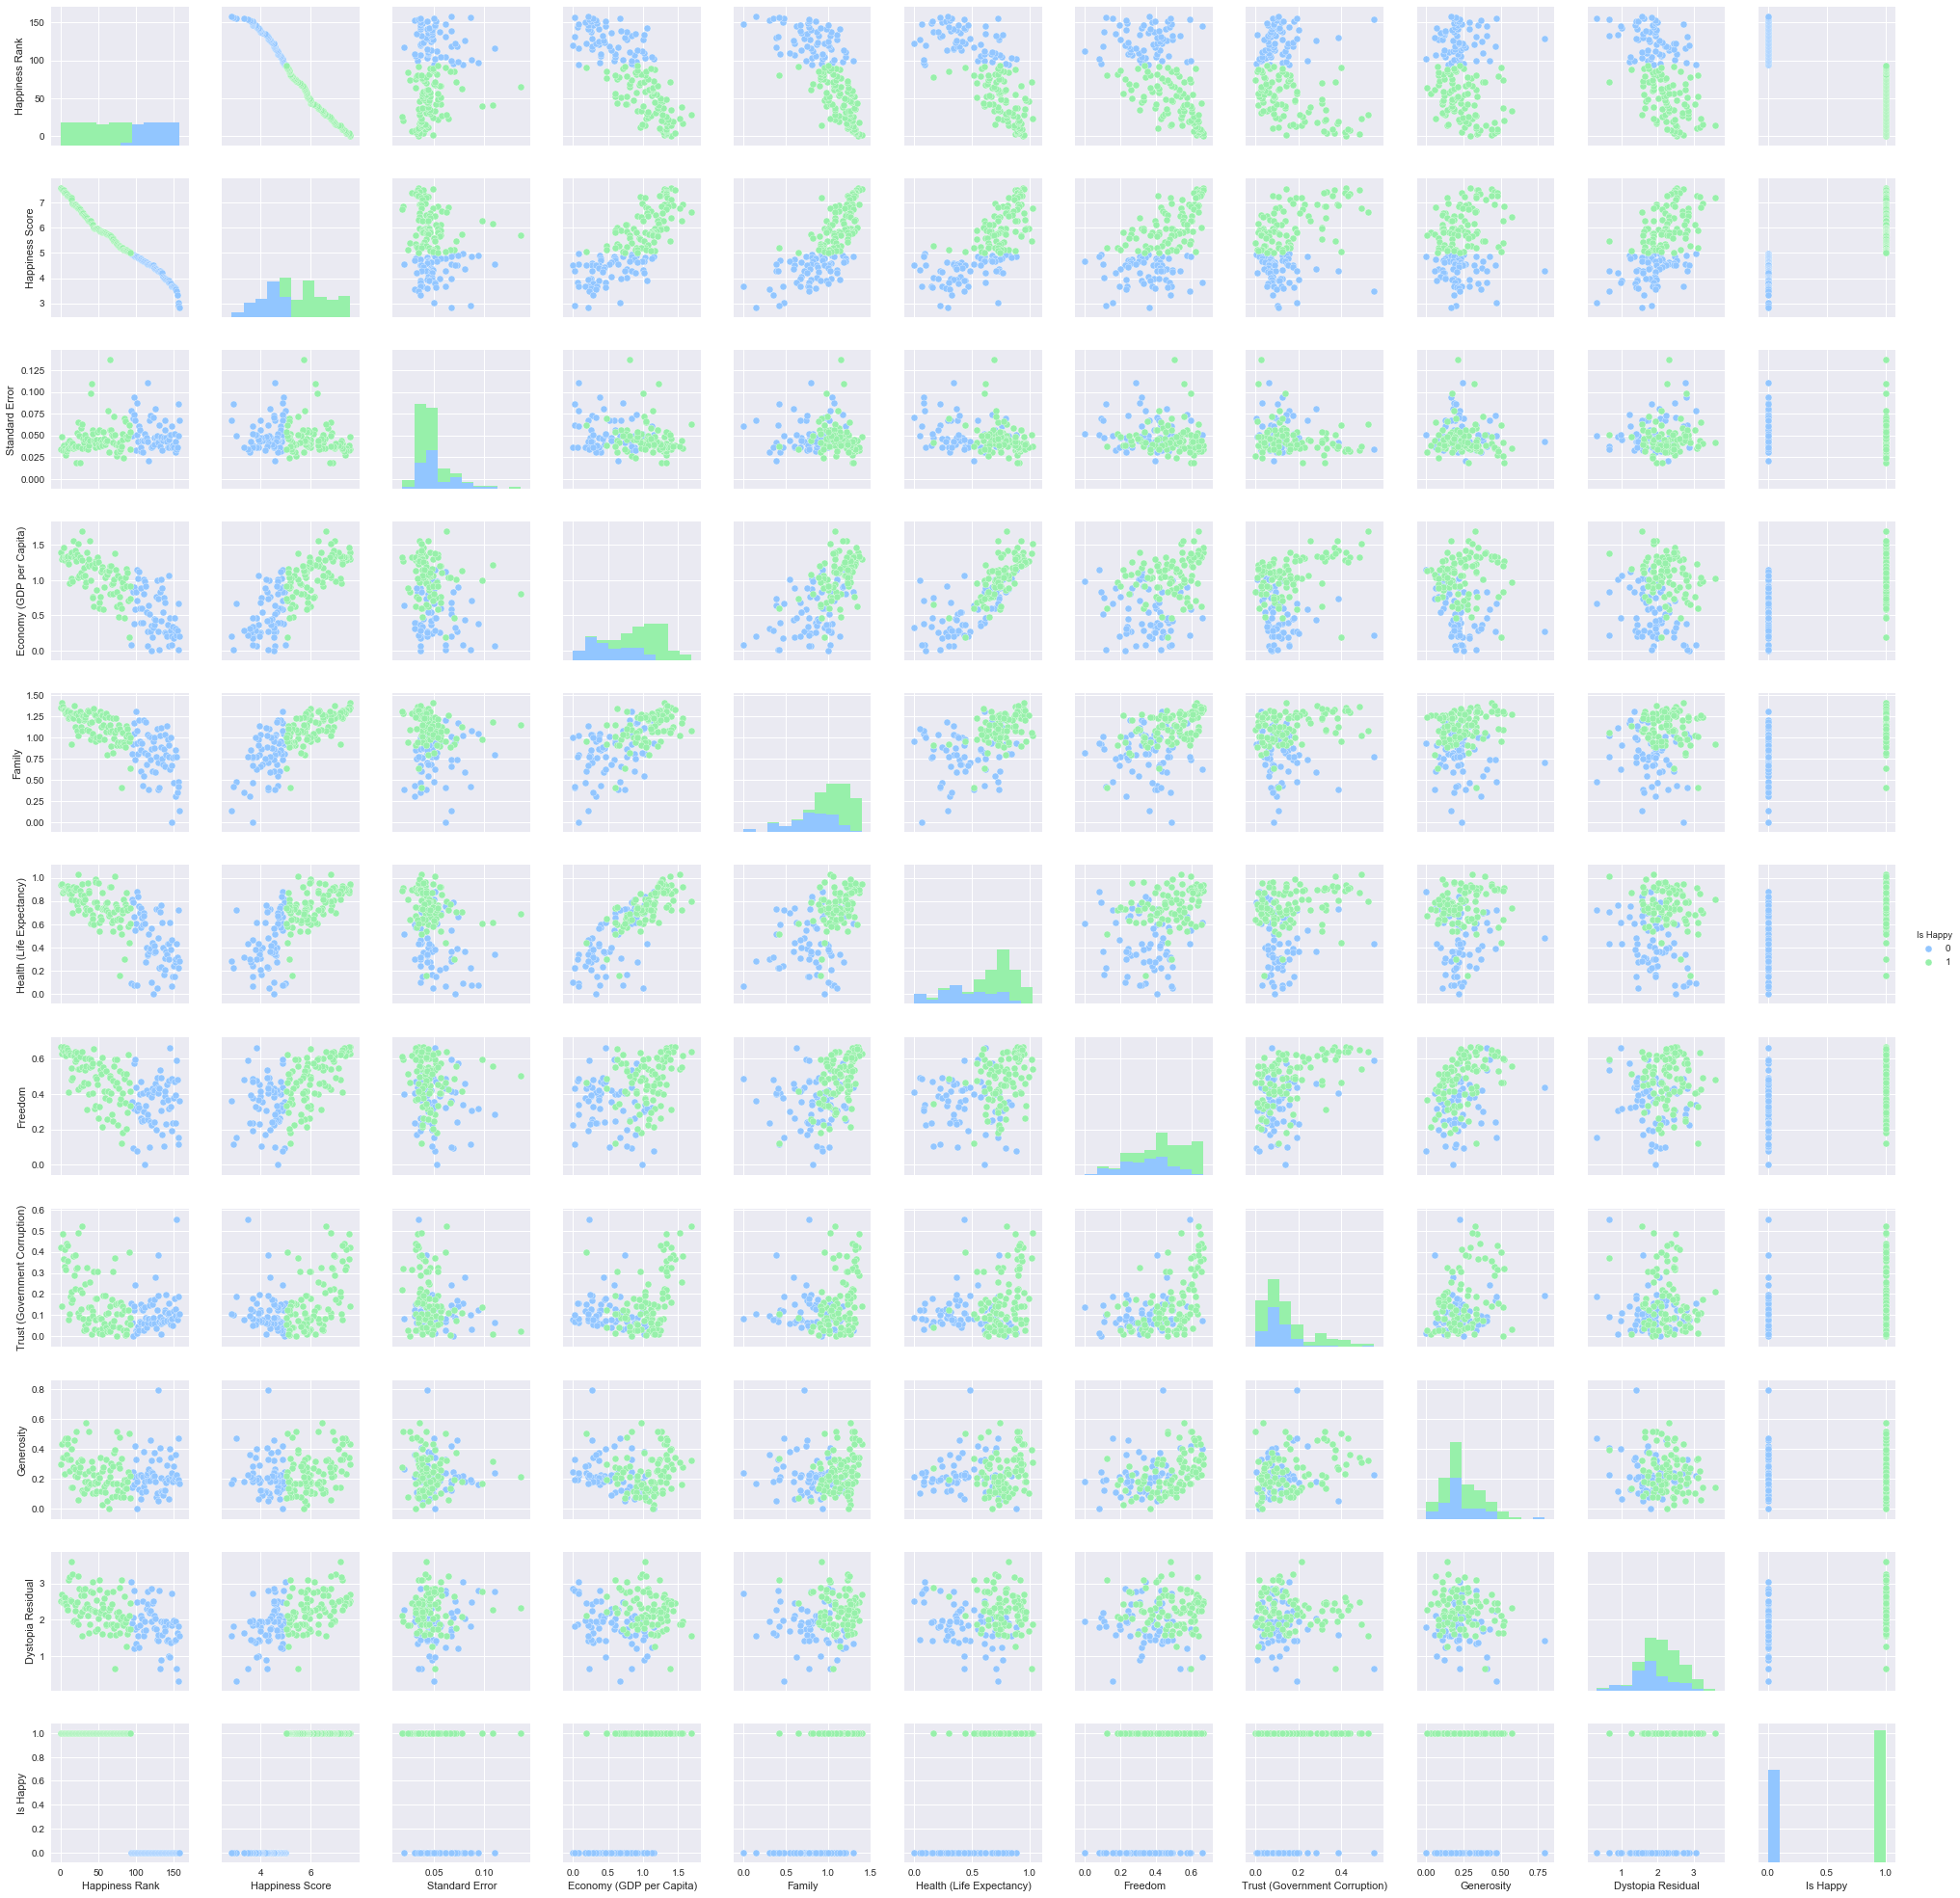

In [46]:
def is_happy(happiness_score):
    if happiness_score >= 5:
        return 1
    return 0

report2015['Is Happy'] = report2015['Happiness Score'].apply(is_happy)
sns.pairplot(report2015, hue = 'Is Happy')

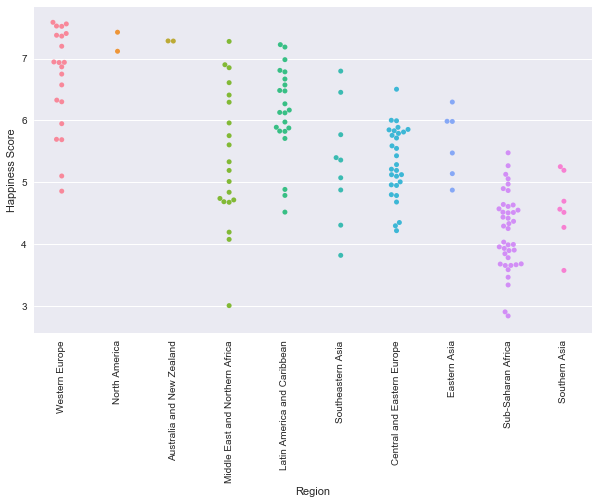

In [75]:
# happiness score in each region
plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
sns.swarmplot(x='Region', y='Happiness Score', data=report2015)

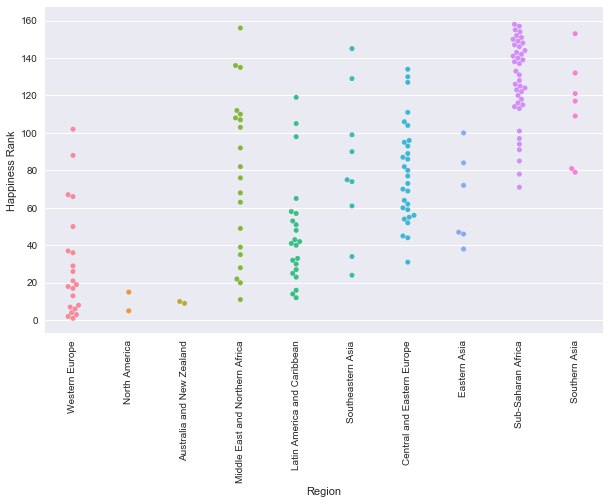

In [58]:
# happiness rank in each region
plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
sns.swarmplot(x='Region', y='Happiness Rank', data=report2015)

In [77]:
data = dict(
        type = 'choropleth',
        colorscale = 'Rd',
        reversescale = True,
        locations = report2015['Country'],
        locationmode = "country names",
        z = report2015['Happiness Score'],
        text = report2015['Country'],
        colorbar = {'title' : 'Happiness Rank'},
      ) 

layout = dict(title = 'World Happiness Report 2015',
                geo = dict(showframe = False,projection = {'type':'Mercator'})
             )

choromap = go.Figure(data = [data],layout = layout)
iplot(choromap,validate=False)